In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
os.chdir("C:/Users/Dell/BusinessAnalyst/1.Boston_Housing_Price")
os.getcwd()

'C:\\Users\\Dell\\BusinessAnalyst\\1.Boston_Housing_Price'

In [3]:
data = pd.read_csv("Boston.csv")
data.shape

(506, 15)

# Missing Value Analysis

In [4]:
data = data.drop('Unnamed: 0', axis =1)

In [5]:
#creating dataframe with missing values
missing_value = pd.DataFrame(data.isnull().sum())
missing_value

,0
Crime,0
Zone,0
Indus,0
Chas,0
Nox,0
Room,0
Age,0
Distance,0
Radial,0
Tax,0


#### We dont have any Missing Value.

# Outlier Analysis

In [6]:
#outliers
df = data.copy()

In [7]:
data['Chas'] = data['Chas'].astype('category')

Crime


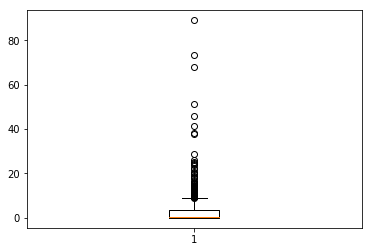

Zone


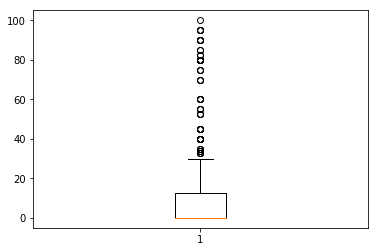

Indus


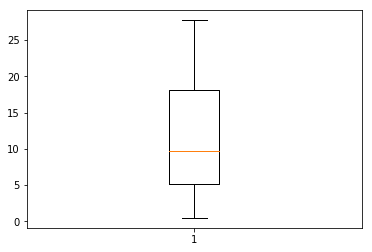

Chas


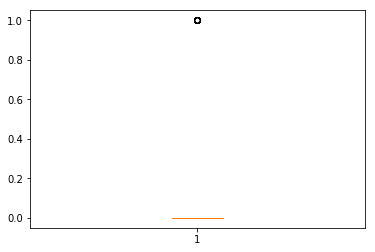

Nox


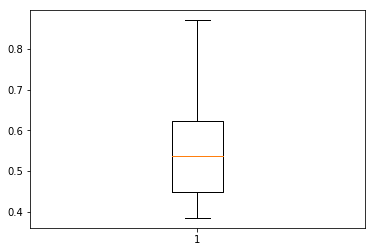

Room


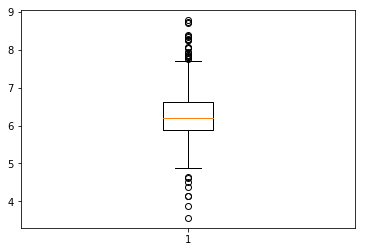

Age


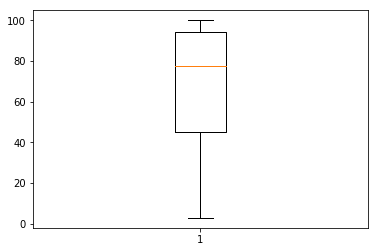

Distance


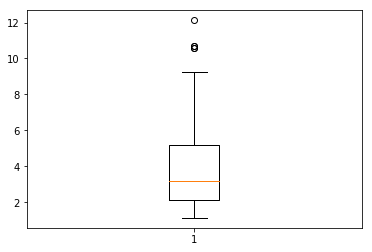

Radial


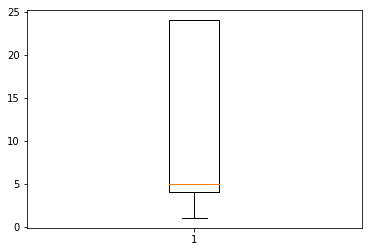

Tax


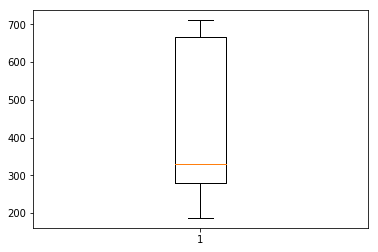

Ptratio


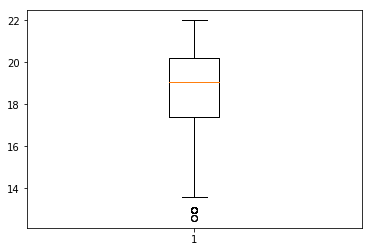

Black


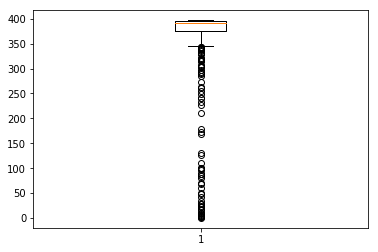

Lstats


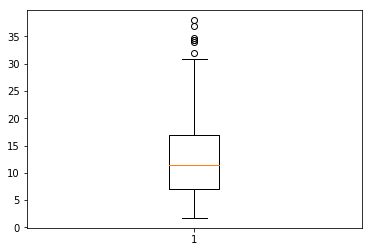

MedianValue


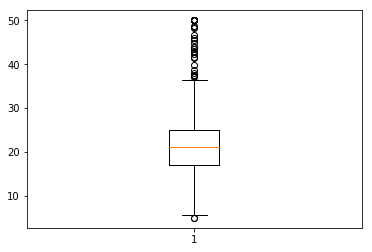

In [8]:
#plotting boxplot
%matplotlib inline
for i in df:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [9]:
cnames = data.columns
cnames

Index(['Crime', 'Zone', 'Indus', 'Chas', 'Nox', 'Room', 'Age', 'Distance',
       'Radial', 'Tax', 'Ptratio', 'Black', 'Lstats', 'MedianValue'],
      dtype='object')

In [10]:
#detect and delete outliers
def removeOutliers(data, cnames):
    for i in cnames:
        print(i)
        q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min=q25 - (iqr*1.5)
        max=q75 + (iqr*1.5)
    
        data = data.drop(data[data.loc[:,i]<min].index)
        data = data.drop(data[data.loc[:,i]>max].index)
    return data

In [11]:
df = removeOutliers(df, cnames)

Crime
Zone
Indus
Chas
Nox
Room
Age
Distance
Radial
Tax
Ptratio
Black
Lstats
MedianValue


In [12]:
df.shape

(214, 14)

#### Outliers are removed. 

# Feature Selection

In [13]:
#correlation analysis, plot
df_corr = data.iloc[:, cnames != 'MedianValue']

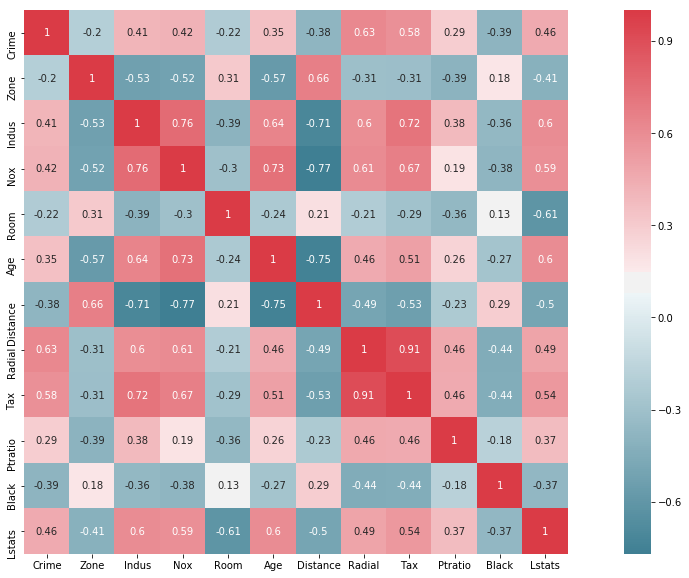

In [14]:
#set the width and height of plot
f, ax = plt.subplots(figsize=(20,10))

#generate correlation
corr = df_corr.corr()

#plot using seaborn
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)

In [15]:
for row in corr:
    for col in corr:
        if row != col:
            if corr[row][col] > 0.8:
                    print(row, '-', col, '=', corr[row][col])
            

Radial - Tax = 0.9102281885331822
Tax - Radial = 0.9102281885331822


#### Highly positively correlated columns that are more than 0.8
     Tax - Radial
#### Since Radial is highly correlated, we will drop that variable

In [16]:
df = df.drop('Radial',axis =1)

In [17]:
#save categorical varibles
cat_names = ["Chas"]

In [18]:
#correlation analysis for categorical variable
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Chas'],data[i]))
    print(p)

Chas
1.0615218130027294e-108


# Feature Scaling

In [19]:
df=data.copy()

Crime


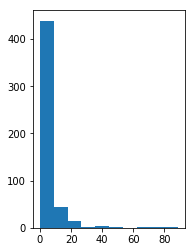

Zone


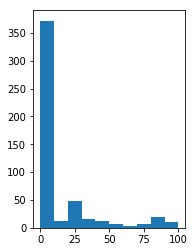

Indus


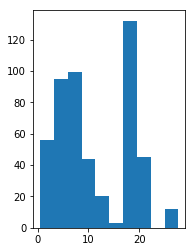

Chas


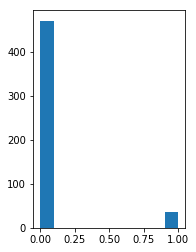

Nox


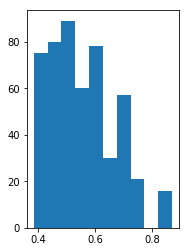

Room


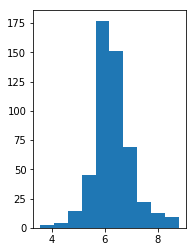

Age


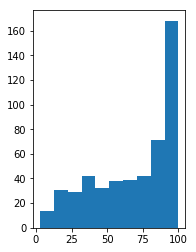

Distance


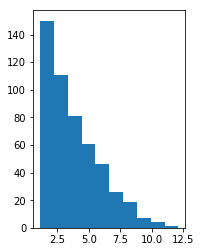

Radial


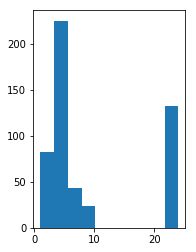

Tax


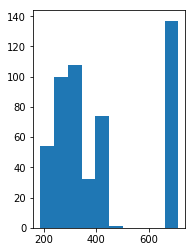

Ptratio


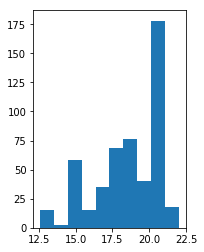

Black


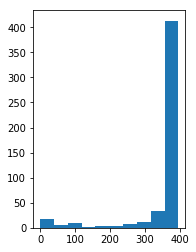

Lstats


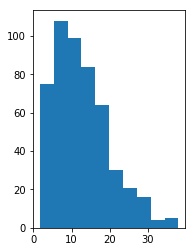

MedianValue


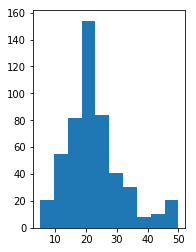

In [20]:
#checking for normality
#plt.hist(data['Room'], bins='auto')

for i in cnames:
    print(i)
    plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
    plt.hist(df[i])
    plt.show()

#### Since the values are continuous we use Normalisation

In [21]:
cnames = data.iloc[:,0:13].columns

In [22]:
cnames = cnames.drop('Chas')

In [23]:
#normalisation
for i in cnames:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [24]:
data.head(5)

,Crime,Zone,Indus,Chas,Nox,Room,Age,Distance,Radial,Tax,Ptratio,Black,Lstats,MedianValue
0,0.000000,0.18,0.067815,0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


##### Here all the values are in the range between 0 to 1

In [25]:
#dividing data to train and test
X=data.iloc[:,0:13]
Y=data.iloc[:,13]

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

# Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
#training the model
regressor = LinearRegression().fit(x_train, y_train)
#to make predictions on test data
y_pred = regressor.predict(x_test)

train_accuracy = regressor.score(x_train, y_train)
test_accuracy = regressor.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  74.23408622001675
Testing Accuracy is  71.74221895795945


In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

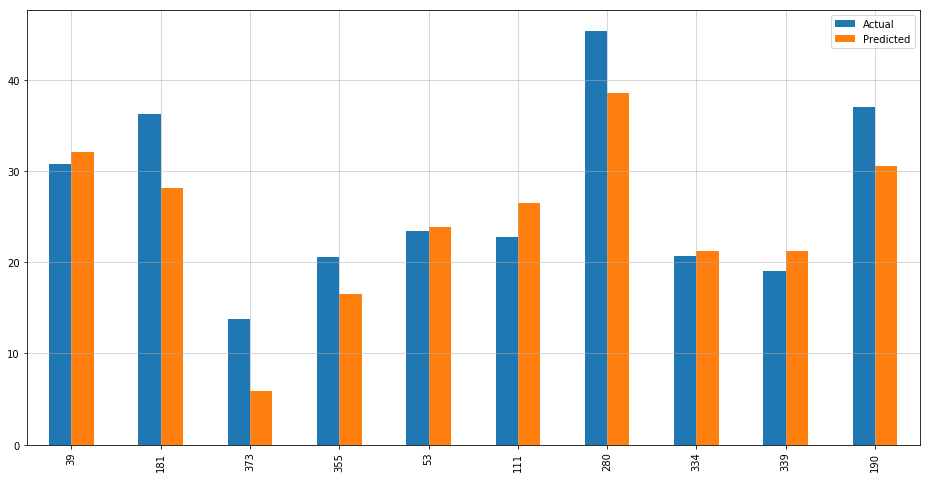

In [28]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

In [29]:
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [30]:
MAPE(y_test, y_pred)

18.333883378216143

# Decision Tree Regressor Method

In [31]:
from sklearn import tree
#training the model
decision_regressor = tree.DecisionTreeRegressor().fit(x_train, y_train)
#to make predictions on test data
y_pred = decision_regressor.predict(x_test)

train_accuracy = decision_regressor.score(x_train, y_train)
test_accuracy = decision_regressor.score(x_test, y_test)

print('Training Accuracy is ', train_accuracy*100)
print('Testing Accuracy is ', test_accuracy*100)

Training Accuracy is  100.0
Testing Accuracy is  68.84143009642479


#### Done